In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statistics as st
import warnings
from sklearn import preprocessing
from sklearn import utils
warnings.filterwarnings('ignore')
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier

In [4]:
data=pd.read_csv(r'/content/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = data['Outcome']
L = []
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [8]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
predictions = nb.predict(x_test)
print("Accuracy: ",(accuracy_score(y_test, predictions)))
L.append((accuracy_score(y_test, predictions)))

Accuracy:  0.7922077922077922


In [10]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model3 = DecisionTreeClassifier(random_state=1)
model2 = KNeighborsClassifier()
model = VotingClassifier(estimators=[('lr', model1), ('dt', model3), ('knn',model2)], voting='hard')
model.fit(x_train,y_train)
print("Accuracy:",model.score(x_test,y_test))
L.append(model.score(x_test,y_test))

Accuracy: 0.8246753246753247


In [11]:
model = RandomForestClassifier(n_estimators=500,criterion='entropy')
model.fit(x_train,y_train)
print('Number of Trees used : ', model.n_estimators)
predict_train = model.predict(x_train)
accuracy_train = accuracy_score(y_train,predict_train)
predict_test = model.predict(x_test)
accuracy_test = accuracy_score(y_test,predict_test)
print('Accuracy_score on test dataset : ', accuracy_test)
L.append(accuracy_test)

Number of Trees used :  500
Accuracy_score on test dataset :  0.8116883116883117


In [15]:
logis = linear_model.LogisticRegression()
model = AdaBoostClassifier(base_estimator=logis)
model.fit(x_train,y_train)
print(model.score(x_test,y_test))
L.append(model.score(x_test,y_test))

0.8051948051948052


In [18]:
print(L)

[0.7922077922077922, 0.8246753246753247, 0.8116883116883117, 0.8051948051948052]


In [19]:
B = ['GaussianNB','MaxVote','RandForst','RegrAdaboost']

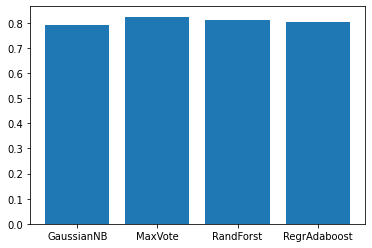

In [20]:
import matplotlib.pyplot as plt
plt.bar(B,L)
plt.show()